In [122]:
import os
print(os.getcwd())
os.chdir("C:/Users/adm-mlung/Desktop/Projekte/MFP\data")


C:\Users\adm-mlung\Desktop\Projekte\MFP\data


In [128]:
df = pd.read_csv('C:/Users/adm-mlung/Desktop/Projekte/MFP/data/Umsatz_tagged_categorized_09122018.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df['Category'] = df['Category'].fillna(' ')

# Anteil getaggter Umsätze

In [129]:
1- len(df[df['Tags'].str.isspace()])/len(df)

1.0

# Anteil kategorisierter Umsätze

In [131]:
1-len(df[df['Category'].str.contains('Andere')])/len(df)

1.0

# Zu taggende Umsätze

In [132]:
tags_rest = df[df['Tags'].str.isspace()]
tags_rest = tags_rest.sort_values(by=['Betrag'])
tags_rest.head()
# tags_rest.iloc[0]['Verwendungszweck']

,Auftragskonto,Buchungstag,Valutadatum,Buchungstext,Verwendungszweck,Beguenstigter/Zahlungspflichtiger,Kontonummer,BLZ,Tags,Category,Betrag,Waehrung,Info


In [121]:
len(df[df['Tags'].str.isspace()])

44

# Verhältnis Mietkosten zu Einnahmen und Ausgaben

In [133]:
Mieten = df[df['Tags'].str.contains('Miete')]
Ausgaben = df[df['Betrag']<0]
Einnahmen = df[df['Betrag']>0]

Sum_Mieten = sum(Mieten['Betrag'])
Sum_Ausgaben = sum(Ausgaben['Betrag'])
Sum_Einnahmen = sum(Einnahmen['Betrag'])


print(Sum_Mieten/Sum_Ausgaben)
print(-1*Sum_Mieten/Sum_Einnahmen)

0.15993980908771988
0.16450972185987617


# Visualisierung Kategorien

## Visualisierung Einnahmen

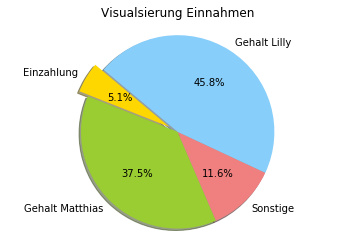

In [134]:
%matplotlib inline
import matplotlib.pyplot as plt
 
# Data to plot
labels = list(set(Einnahmen['Category']))
sizes = [sum(Einnahmen[Einnahmen['Category']==labels[i]]['Betrag']) for i in range(len(labels))]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue'][0:4]
explode = (0.1, 0, 0,0)  # explode 1st slice
 
 # Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
         autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title('Visualsierung Einnahmen')
plt.show()

In [135]:
sizes

[2150.0, 15789.48, 4874.0199999999995, 19311.67]

In [136]:
list(set(Einnahmen['Category']))[:-1]

['Einzahlung', 'Gehalt Matthias', 'Sonstige']

## Visualisierung Ausgaben

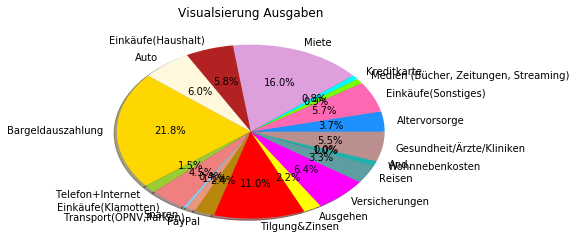

In [138]:
%matplotlib inline
import matplotlib.pyplot as plt
 
# Data to plot
labels_Ausgaben = list(set(Ausgaben['Category']))
sizes_Ausgaben = [-1*sum(Ausgaben[Ausgaben['Category']==labels_Ausgaben[i]]['Betrag']) for i in range(len(labels_Ausgaben))]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','darksalmon','darkgoldenrod',
          'red','yellow','fuchsia','cadetblue','lightseagreen','slategray','rosybrown',
         'dodgerblue','hotpink','lawngreen','cyan','plum','firebrick','cornsilk','darkviolet'
         ][:20] 
 # Plot
plt.pie(sizes_Ausgaben, labels= labels_Ausgaben, colors=colors, shadow=True, autopct='%1.1f%%', startangle=140)
#plt.legend(labels_Ausgaben, loc="best") 
plt.title('Visualsierung Ausgaben')
plt.savefig('myfig')
#plt.show()

In [106]:
sizes_Ausgaben

[9450.830000000002,
 657.94,
 1910.82,
 160.0,
 470.45,
 1031.8500000000001,
 4673.86,
 787.9499999999999,
 1496.6600000000003,
 2735.8799999999997,
 424.0,
 838.53,
 2135.750000000001,
 1616.3200000000002,
 2245.5599999999995,
 407.37,
 343.11,
 6930.0,
 2452.4199999999996,
 2559.499999999999]

In [107]:
len(sizes_Ausgaben)

20

In [108]:
len(sizes_Ausgaben)


20

In [109]:
len(colors)

20

In [110]:
labels_Ausgaben

['Bargeldauszahlung',
 'Telefon+Internet',
 'Einkäufe(Klamotten)',
 'Sparen',
 'Transport(ÖPNV,Parken)',
 'PayPal',
 'Tilgung&Zinsen',
 'Ausgehen',
 'Andere',
 'Versicherungen',
 'Wohnnebenkosten',
 'Reisen',
 'Gesundheit/Ärzte/Kliniken',
 'Altervorsorge',
 'Einkäufe(Sonstiges)',
 'Medien (Bücher, Zeitungen, Streaming)',
 'Kreditkarte',
 'Miete',
 'Einkäufe(Haushalt)',
 'Auto']

# Offene Fragen

Was sind die Umsätze mit Betrag <= 1 (absolut) ?